<a href="https://colab.research.google.com/github/cu-applied-math/appm-4600-numerics/blob/main/Demos/Ch8_ContinuousL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
from numpy.polynomial import Polynomial, Chebyshev, Legendre
from numpy.polynomial import polynomial as P
import sympy
from matplotlib import pyplot as plt

# Approximation of a function in the continuous sense
We'll approximate a function $f(x)$, on some domain $[a,b]$, via a polynomial $p\in\mathcal{P}_n$, in order to minimize the weighted $L^2$ error
$$\|f-p\|_2 = \sqrt{\int_a^b w(x)(f(x)-p(x))^2\,dx}$$
for some weight function $w(x)\ge 0$.

We can choose any polynomial basis we want, but a good choice is an orthogonal basis.  If we choose $w(x)=1$ then we'd use the Legendre polynomials; if we choose $w(x)=1/\sqrt{1-x^2}$, then we'd use the Chebyshev polynomials.

In this orthogonal basis, we still need to "solve a linear system" of equations, but it's trivial, since it's a diagonal system. Finding the coefficients of this system involve doing some integrals. You can do these by hand or... via `sympy`, Python's **symbolic math** package.

Learning objectives
- See how this seemingly "abstract" math problem is actually concrete, and leads to an actual polynomial approximation


Copyright University of Colorado Boulder Applied Math department, 2025. Released under a BSD 3-clause license.

In [54]:
# Pick a domain:
a, b = -1,1

x = sympy.symbols('x')
f = sympy.sin(x)**2
f_numeric = sympy.lambdify(x, f, 'numpy')
# and our weight function
w = 1/sympy.sqrt(1-x**2)
f

sin(x)**2

In [55]:
T0 = sympy.chebyshevt(0, x)
T1 = sympy.chebyshevt(1, x)
T2 = sympy.chebyshevt(2, x)
T3 = sympy.chebyshevt(3, x)
T3

4*x**3 - 3*x

In [56]:
a3 = sympy.integrate( w * T3 * f, (x, a, b )).evalf() / sympy.integrate( w * T3**2, (x, a, b )).evalf()
a2 = sympy.integrate( w * T2 * f, (x, a, b )).evalf() / sympy.integrate( w * T2**2, (x, a, b )).evalf()
a1 = sympy.integrate( w * T1 * f, (x, a, b )).evalf() / sympy.integrate( w * T1**2, (x, a, b )).evalf()
a0 = sympy.integrate( w * T0 * f, (x, a, b )).evalf() / sympy.integrate( w * T0**2, (x, a, b )).evalf()
coeff = np.array([a0, a1, a2, a3])
poly = Chebyshev(coeff,domain=(a,b))

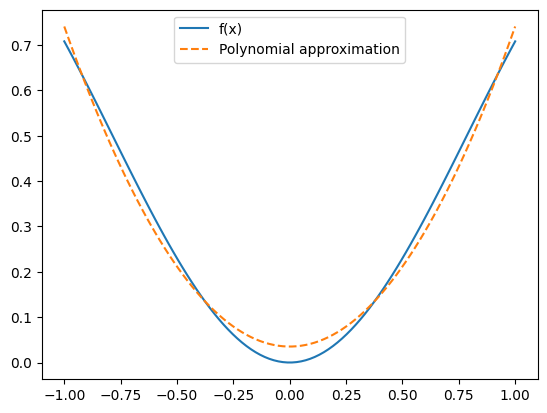

In [57]:
xGrid = np.linspace(a, b, 100)
plt.plot(xGrid, f_numeric(xGrid), label='f(x)')
plt.plot(xGrid, poly(xGrid), '--', label='Polynomial approximation')
plt.legend()
plt.show()

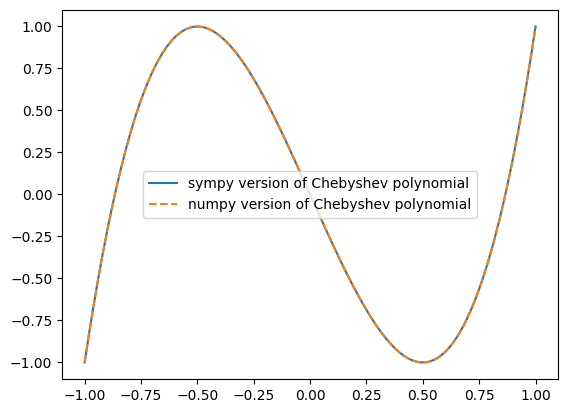

In [42]:
# Sanity check: make sure that sympy and numpy have the same conventions
# for normalization of the Chebyshev polynomials

xGrid = np.linspace(a, b, 100)

T_sympy = sympy.lambdify(x, T3, 'numpy')
T_numpy = Chebyshev( [0,0,0,1], domain=(a,b))

plt.plot(xGrid, T_sympy(xGrid), label='sympy version of Chebyshev polynomial')
plt.plot(xGrid, T_numpy(xGrid), '--',label='numpy version of Chebyshev polynomial')
plt.legend()
plt.show()